Import packages:

In [19]:
import random
import matplotlib.pyplot as plt

Properties of transaction

In [20]:
## Probability of photon being lost in transmission
lose_in_tx_chance=input("Probability of losing a photon in transmission [%]: ")
valid=False
while valid == False:
    try:
        lose_in_tx_chance=int(lose_in_tx_chance)
    except:
        lose_in_tx_chance=input("-----\nError: Value must be a number\nProbability of losing a photon in transmission [%]: ")
    else:
        if lose_in_tx_chance > 100 or lose_in_tx_chance < 0:
            lose_in_tx_chance=input("-----\nError: Value must be between 0 and 100\nProbability of losing a photon in transmission [%]: ")
        else:
            valid=True
print ("Chance of photon loss on transmission: "+str(lose_in_tx_chance)+"%")

## Number of random bits being sent
no_bits=input("Number of random bits being sent: ")
valid=False
while valid == False:
    try:
        no_bits=int(no_bits)
    except:
        no_bits=input("-----\nError: Value must be a number\nNumber of random bits being sent: ")
    else:
        if no_bits <= 0:
            no_bits=input("-----\nError: Value must be above 0\nNumber of random bits being sent: ")
        else:
            valid=True
print ("Number of random bits being sent: "+str(no_bits))

Chance of photon loss on transmission: 25%
Number of random bits being sent: 16


Define functions:

In [21]:
def string_to_array(string):
    array=[]
    for i in string:
        array.append(i)
    return array

def generate_random_bits(length):
    binary_string = ''.join(random.choice('01') for _ in range(length))
    return string_to_array(binary_string)

def generate_random_bases(length):
    bases_string = ''.join(random.choice('DR') for _ in range(length))
    return string_to_array(bases_string)

def text_to_binary(text):
    binary_string = ''.join(format(ord(char), '08b') for char in text)
    return binary_string

def binary_to_text(binary_string):
    # Split the binary string into 8-bit chunks
    binary_chunks = [binary_string[i:i+8] for i in range(0, len(binary_string), 8)]
    # Convert each 8-bit chunk to its decimal equivalent and then to a character
    text = ''.join(chr(int(chunk, 2)) for chunk in binary_chunks)
    return text

def test_percentage(prob):
    # generate a random number between 0 and 1
    if random.random() < (prob/100):      # if the number is less than 0.25, return true
        return True
    else:                           # otherwise, return false
        return False

Alice & Bob's Properties (Sender & Receiver):

In [22]:
#Alice
alice_bits=generate_random_bits(no_bits)
sending_bases=generate_random_bases(no_bits)

#Bob
receiving_bases=generate_random_bases(no_bits)

In [23]:
sending_photons=[]
for i in range(len(sending_bases)):
    if sending_bases[i] == "D" and alice_bits[i] == "0":
        sending_photons.append("/")
    elif sending_bases[i] == "D" and alice_bits[i] == "1":
        sending_photons.append("\\")
    elif sending_bases[i] == "R" and alice_bits[i] == "0":
        sending_photons.append("-")
    elif sending_bases[i] == "R" and alice_bits[i] == "1":
        sending_photons.append("|")
    else:
        print("Error: D, R or 0, 1 are expected")

In [24]:
received_bits=[]
for i in range(len(sending_bases)):
    if test_percentage(lose_in_tx_chance) == True:
        received_bits.append(" ")
    else:
        # Incoming: /  (0)
        if sending_photons[i] == "/":
            if receiving_bases[i] == "D":
                received_bits.append("0")
            elif receiving_bases[i] == "R":
                if test_percentage(50) == True:
                    received_bits.append("0")
                else:
                    received_bits.append("1")
            else:
                print("Error (photon = /):",receiving_bases[i],"is not an expected state [D,R] of the random receiving bases")

        # Incoming: \  (1)
        elif sending_photons[i] == "\\":
            if receiving_bases[i] == "D":
                received_bits.append("1")
            elif receiving_bases[i] == "R":
                if test_percentage(50) == True:
                    received_bits.append("0")
                else:
                    received_bits.append("1")
            else:
                print("Error (photon = \):",receiving_bases[i],"is not an expected state [D,R] of the random receiving bases")

        # Incoming: -  (0)
        elif sending_photons[i] == "-":
            if receiving_bases[i] == "R":
                received_bits.append("0")
            elif receiving_bases[i] == "D":
                if test_percentage(50) == True:
                    received_bits.append("0")
                else:
                    received_bits.append("1")
            else:
                print("Error (photon = -):",receiving_bases[i],"is not an expected state [D,R] of the random receiving bases")

        # Incoming: |  (1)
        elif sending_photons[i] == "|":
            if receiving_bases[i] == "R":
                received_bits.append("1")
            elif receiving_bases[i] == "D":
                if test_percentage(50) == True:
                    received_bits.append("0")
                else:
                    received_bits.append("1")
            else:
                print("Error (photon = |):",receiving_bases[i],"is not an expected state [D,R] of the random receiving bases")

        else:
            print("Error:",sending_photons[i],"is not an expected state [-,|,/,\\] of of transmission photons")

Public Discussion

In [25]:
public_dis=[]
for i in range(len(sending_bases)):
    if received_bits[i] != " " and sending_bases[i] == receiving_bases[i]:
        public_dis.append("OK")
    else:
        public_dis.append(" ")
if len(sending_bases) != len(public_dis):
    print("Error: the public discussion array is either too long or too short")

# Key generation
key_bit=[]
for i in range(len(public_dis)):
    if public_dis[i] == "OK":
        key_bit.append(received_bits[i])
    else:
        key_bit.append(" ")
if len(public_dis) != len(key_bit):
    print("Error: the public discussion array is either too long or too short")

Show Key and key length

In [26]:
# Turn array into string
key=""
for i in key_bit:
    if i != " ":
        key=key+i
print("Key:",key)
print("Key Length (bits):",len(key))

Key: 100001011
Key Length (bits): 9


Display table

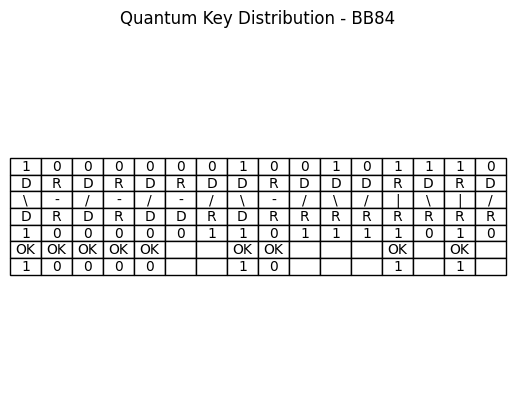

In [27]:
data = [alice_bits,sending_bases,sending_photons,receiving_bases,received_bits,public_dis,key_bit]

# create a figure and an axes object
fig, ax = plt.subplots()

# create a table from the data and add it to the axes
table = plt.table(cellText=data,
                  loc='center',cellLoc='center')

# hide the axes ticks and labels
ax.axis('off')

#
plt.title("Quantum Key Distribution - BB84")

# show the figure
plt.show()
